Best k: 5, Best accuracy: 0.12612612612612611
              precision    recall  f1-score   support

           0       0.15      0.20      0.17        15
           1       0.33      0.31      0.32        13
           2       0.11      0.33      0.17         6
           3       0.06      0.14      0.09         7
           4       0.20      0.09      0.12        11
           5       0.11      0.09      0.10        11
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        15
           8       0.09      0.08      0.09        12
           9       0.20      0.08      0.11        13

    accuracy                           0.13       111
   macro avg       0.13      0.13      0.12       111
weighted avg       0.13      0.13      0.12       111

Test sequence: 74
Recognized sequence: 6122


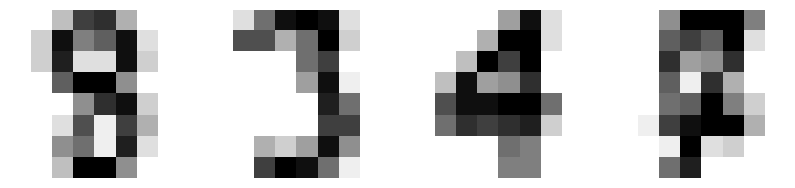

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

digits = datasets.load_digits()

def generate_sequence(length, charset, image_size=(8,8)):
    sequence = ''.join(np.random.choice(list(charset), length))
    images = []
    for char in sequence:
        index = np.random.randint(len(digits.images))
        image = digits.images[index].reshape(image_size)
        images.append(image)
    return sequence, images

charset = '0123456789'

train_sequences = []
train_images = []
test_sequences = []
test_images = []

num_train = 100
num_test = 50

for i in range(num_train):
    seq, imgs = generate_sequence(np.random.randint(1, 5), charset)
    train_sequences.append(seq)
    train_images.extend(imgs)

for i in range(num_test):
    seq, imgs = generate_sequence(np.random.randint(1, 5), charset)
    test_sequences.append(seq)
    test_images.extend(imgs)

train_data = np.array([img.reshape(-1) for img in train_images])
test_data = np.array([img.reshape(-1) for img in test_images])

train_labels = ''.join(train_sequences)
test_labels = ''.join(test_sequences)

best_k = 1
best_accuracy = 0

for k in range(1, 11):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, list(train_labels))
    y_pred = classifier.predict(test_data)
    accuracy = accuracy_score(list(test_labels), y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k: {best_k}, Best accuracy: {best_accuracy}")

classifier = KNeighborsClassifier(n_neighbors=best_k)
classifier.fit(train_data, list(train_labels))
y_pred = classifier.predict(test_data)

print(classification_report(list(test_labels), y_pred))

def recognize_sequence(sequence_images, classifier):
    recognized_sequence = ""
    for img in sequence_images:
      img = img.reshape(1,-1)
      predicted_char = classifier.predict(img)[0]
      recognized_sequence += predicted_char
    return recognized_sequence

test_index = 0
recognized = recognize_sequence(test_images[test_index * 4: (test_index + 1) * 4 ], classifier)
print(f"Test sequence: {test_sequences[test_index]}")
print(f"Recognized sequence: {recognized}")

fig, axes = plt.subplots(1, len(test_images[test_index*4: (test_index + 1) * 4 ]), figsize=(10, 5))
for i, image in enumerate(test_images[test_index * 4: (test_index + 1) * 4]):
    axes[i].imshow(image, cmap=plt.cm.gray_r)
    axes[i].axis('off')
plt.show()